# **Data and Analysis Plan: MBTA Made Easy**

- Nitya Gopalakrishnan
- Elaina Kreher 
- Harshita Narahari

## Project Goal:

The goal of our project is to explore the connection between wait times and how delayed a train is in the MBTA. To achieve this goal, we have chosen to focus on the travel times, dwell or wait times, and past alerts. By finding informtion about travel times and dwell times we will be able analyze whether there is a pattern between popular train routes. Hopefully, this will allow us to answer the following questions:
- Can we determine certain features that cause a train route to be more popular than others? 
- Are there trends or patterns in the trains that are constantly delayed?

To find our data we will be using "https://www.mbta.com/developers/v3-api" which is the MBTA V3 API and a csv file from the MBTA Open Data Portal "https://mbta-massdot.opendata.arcgis.com/datasets/MassDOT::rapid-transit-and-bus-prediction-accuracy-data/explore"

## Pipeline Overview 

For the MBTA V3 API:
- get_routes()
 - requests the MBTA data for a given route (Red, Green, Orange, Blue, Purple lines)
- get_MBTA_data()
 - using get_routes() function, accesses the features of the data that will help determine the popularity of a MBTA train route 

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import requests
import json
import pandas as pd

In [2]:
def get_routes(route):
    """ gets the MBTA route API information for a given subway line 
    
    Args:
        route (str): the given MBTA subway line (red, orange, green, blue, purple)
        
    Returns:
        route_dict (dictionary): a dictionary that contains the API information in JSON form, as well as the arguments
    """ 
    # url from the mbta api
    url = f"https://api-v3.mbta.com/vehicles?include=route&fields[route]={route}"
    response = requests.get(url)
    route_dict = json.loads(response.text)
    return route_dict

In [3]:
#get_routes("Red Line")

In [3]:
def get_mbta_data(route_dict):
    """ returns a dataframe of the dictionary that has API route information for a given MBTA subway line
    
    Args:
        route_dict (str): a dictionary that contains the API information in JSON form, as well as the arguments
        
    Returns:
        route_df (dictionary): a dataframe that contains the API information for a given MBTA subway line 
    """ 

    # final dictionary that will be returned 
    data_dict = {
        'label': [], 
        'current_status': [], 
        'occupancy_status': [],
        'lat_long': [], 
        'direction_id': [], 
        'related_route': [],
        'stop_sequence': [],
    }

    # creating a dataframe of the given dict by looping through the jsons
    for item in route_dict['data']:
         attributes = item['attributes']
         data_dict['label'].append(attributes['label'])
         data_dict['current_status'].append(attributes['current_status'])
         data_dict['occupancy_status'].append(attributes['occupancy_status'])
         data_dict['lat_long'].append((attributes['latitude'], attributes['longitude'])),
         data_dict['direction_id'].append(attributes['direction_id'])
         data_dict['related_route'].append(item['relationships']['route']['data']['id'])
         data_dict['stop_sequence'].append(attributes['current_stop_sequence'])

    route_df = pd.DataFrame(data_dict)

    return route_df

In [4]:
get_mbta_data(get_routes("Blue Line")).head(10)

,label,current_status,occupancy_status,lat_long,direction_id,related_route,stop_sequence
0,1978,IN_TRANSIT_TO,MANY_SEATS_AVAILABLE,"(42.373128129, -71.09648085)",1.0,69,10.0
1,0799,STOPPED_AT,MANY_SEATS_AVAILABLE,"(42.2521309, -71.0052581)",0.0,238,1.0
2,1655,STOPPED_AT,MANY_SEATS_AVAILABLE,"(42.28627788, -71.13765978)",0.0,36,12.0
3,1677,IN_TRANSIT_TO,MANY_SEATS_AVAILABLE,"(42.281425239, -71.133520649)",1.0,34,21.0
4,3309,IN_TRANSIT_TO,MANY_SEATS_AVAILABLE,"(42.457296779, -70.97182401)",0.0,426,39.0
5,2059,STOPPED_AT,MANY_SEATS_AVAILABLE,"(42.38166, -71.09846)",1.0,85,1.0
6,1754,STOPPED_AT,MANY_SEATS_AVAILABLE,"(42.36766026, -71.12437046)",0.0,66,30.0
7,1277,STOPPED_AT,MANY_SEATS_AVAILABLE,"(42.32972, -71.08384)",1.0,749,1.0
8,1924,IN_TRANSIT_TO,MANY_SEATS_AVAILABLE,"(42.35658266, -71.18372064)",1.0,558,44.0
9,3201,IN_TRANSIT_TO,MANY_SEATS_AVAILABLE,"(42.354341809, -71.11806005)",1.0,501,10.0


## Supplemental Data Overview

In addition to the MBTA API data, we chose to also use a CSV file containing information about how long a train route was on average and whether the MBTA's prediction of that route was accurate. We felt this was important data to utilize in our project because one of the biggest problems with the MBTA is that their schedules are always either running too early or too late. By using this dataset, we will have access to the average route duration and the accuracy score of what the MBTA predicted the average duration would be. 
To use this csv file:
- We will convert the csv file into a dataframe
- get_clean_data()
  - Remove missing values, keep only features that are relevant to our project, add useful columns

In [5]:
predictions = pd.read_csv('mbtapredictions.csv')
predictions.head(10)

,weekly,mode,route_id,bin,arrival_departure,num_predictions,num_accurate_predictions,ObjectId
0,2021/08/13 04:00:00+00,bus,NaN,0-3 min,departure,293039,233562,1
1,2021/08/13 04:00:00+00,bus,NaN,3-6 min,departure,285817,229090,2
2,2021/08/13 04:00:00+00,bus,NaN,6-12 min,departure,561098,472923,3
3,2021/08/13 04:00:00+00,bus,NaN,12-30 min,departure,1594830,1405620,4
4,2021/08/20 04:00:00+00,bus,NaN,0-3 min,departure,285591,228653,5
5,2021/08/20 04:00:00+00,bus,NaN,3-6 min,departure,279036,224935,6
6,2021/08/20 04:00:00+00,bus,NaN,6-12 min,departure,543125,459159,7
7,2021/08/20 04:00:00+00,bus,NaN,12-30 min,departure,1552558,1373367,8
8,2021/08/27 04:00:00+00,bus,NaN,0-3 min,departure,277930,219694,9
9,2021/08/27 04:00:00+00,bus,NaN,3-6 min,departure,271270,213009,10


## Data Cleaning 

In [6]:
def get_clean_data(df):
    """ returns a dataframe of the cleaned data that comes from the mbtapredictions csv file 
    
    Args:
        df (dataframe): a dataframe of the mbtapredictions csv file 
        
    Returns:
        clean_df (dictionary): a dataframe that contains the mbtapredictions information but with no missing data, 
                               only for subways, and an added column for the accuracy score
    """ 
    # for our project we are only focusing on mbta subway data 
    clean_df = df[(df['mode'] == 'subway')]
    # we do not need this id because it is just the count 
    clean_df = clean_df.drop('ObjectId', axis = 1)
    # add a column calculating the accuracy score of the predictions 
    clean_df['accuracy_score'] = df['num_accurate_predictions']/df['num_predictions']
    return clean_df

In [7]:
get_clean_data(predictions).head(10)

,weekly,mode,route_id,bin,arrival_departure,num_predictions,num_accurate_predictions,accuracy_score
401,2020/08/10 04:00:00+00,subway,Red,0-3 min,blended,139618,126760,0.907906
501,2020/08/10 04:00:00+00,subway,Red,3-6 min,blended,141110,128809,0.912827
502,2020/08/10 04:00:00+00,subway,Red,6-12 min,blended,277144,256159,0.924281
503,2020/08/10 04:00:00+00,subway,Red,12-30 min,blended,788909,683246,0.866064
504,2020/08/17 04:00:00+00,subway,Blue,0-3 min,blended,74490,65326,0.876977
505,2020/08/17 04:00:00+00,subway,Blue,3-6 min,blended,75513,65773,0.871016
506,2020/08/17 04:00:00+00,subway,Blue,6-12 min,blended,142072,126600,0.891097
507,2020/08/17 04:00:00+00,subway,Blue,12-30 min,blended,376708,337641,0.896294
508,2020/08/17 04:00:00+00,subway,Green-B,0-3 min,blended,146228,120275,0.822517
509,2020/08/17 04:00:00+00,subway,Green-B,3-6 min,blended,141235,118375,0.838142


## Data Visualizations

In [8]:
import plotly
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# data for the red, green, and orange lines
red_line = get_mbta_data(get_routes("Red Line"))
green_line = get_mbta_data(get_routes("Green Line"))
orange_line = get_mbta_data(get_routes("Orange Line"))

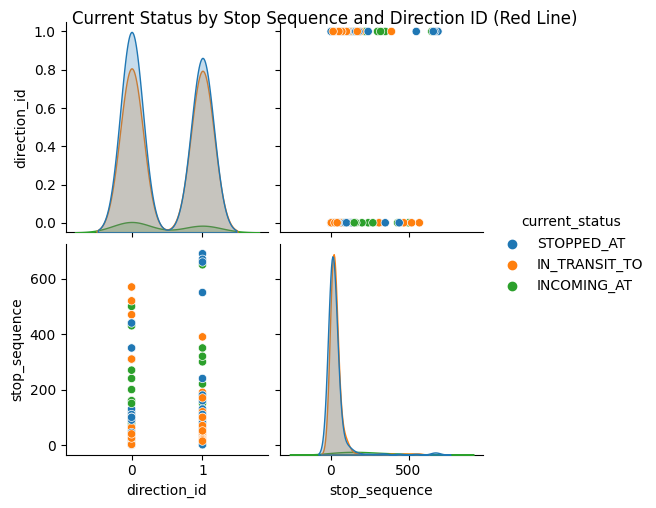

In [14]:
# pair plot of the stop sequence, direction id, and current status
sns.pairplot(data=red_line, hue='current_status')
plt.suptitle('Current Status by Stop Sequence and Direction ID (Red Line)', y=1)
plt.xlabel('Stop Sequence')
plt.ylabel('Direction ID')
plt.show()

This visualization plots the Stop Sequence and Direction ID of the train in terms of current status for the Red Line.

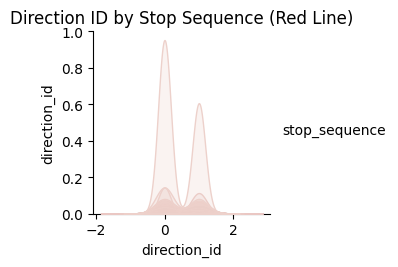

In [14]:
# pair plot of the current status, occupancy status, and stop sequence
sns.pairplot(data=red_line, hue='stop_sequence')
plt.title('Direction ID by Stop Sequence (Red Line)')
plt.xlabel('Stop Sequence')
plt.ylabel('Direction ID')
plt.show()

This visualization plots the Current Status of the train and Occupancy Status of the train for the Orange Line.

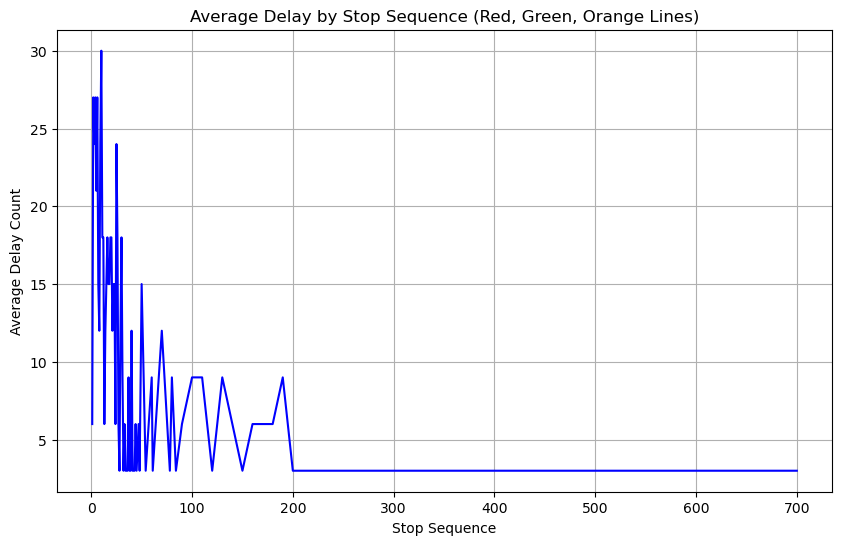

In [13]:
# aggregates all the subway lines into one dataframe 
all_lines_data = pd.concat([red_line, green_line, orange_line], ignore_index=True)
delayed_data = all_lines_data[all_lines_data['current_status'] != 'STOPPED_AT']
average_delays = delayed_data.groupby('stop_sequence')['label'].count().reset_index()

# plots a graph of the average delay times by stop sequence 
plt.figure(figsize=(10, 6))
sns.lineplot(x='stop_sequence', y='label', data=average_delays, color='blue')
plt.title('Average Delay by Stop Sequence (Red, Green, Orange Lines)')
plt.xlabel('Stop Sequence')
plt.ylabel('Average Delay Count')
plt.grid(True)
plt.show()

## Analysis/ML Plan

In the context of analyzing MBTA data to explore connections between wait times and train delays, several machine learning tools and techniques can be considered. One of the fundamental tools might involve regression analysis, particularly linear regression or its variations. Linear regression assumes a linear relationship between variables, which in this case could help analyze how wait times relate to train delays. However, it assumes that the relationship between the variables is linear, there is minimal multicollinearity (i.e., the features are not highly correlated), and the data is homoscedastic (constant variance).

Another tool that could be employed is clustering algorithms like K-means clustering. Clustering helps identify inherent patterns within the data, such as categorizing various routes based on delay patterns or identifying specific groups of trains with similar characteristics. Clustering methods generally assume that the clusters are spherical, have similar density, and clusters are separable. It's important to preprocess data properly, selecting the right features, and normalizing if required to obtain better clustering results.

Additionally, classification methods like decision trees, random forests, or neural networks might be useful to predict delays or categorize factors influencing popular train routes. These methods make assumptions based on the nature of the data and the problem being solved. Decision trees assume hierarchical relationships in the data and create splits based on feature importance. Random forests further enhance decision trees by aggregating multiple trees, while neural networks handle complex non-linear relationships by processing multiple hidden layers. These techniques often assume the availability of significant amounts of training data and require careful hyperparameter tuning to avoid overfitting or underfitting.

# Random Forest Model

In our analysis, we encountered a challenge when attempting to create a linear regression model to predict delays. The dataset did not include specific information about delays, making it difficult to formulate a regression model. Recognizing the absence of this crucial information, we decided to shift our focus to analyzing the occupancy status of trains. The available data allowed us to explore and predict the occupancy status of trains using a Random Forest model. This approach enables us to understand and predict factors related to the availability of seats on trains, which is valuable information for both commuters and transit operators. While the initial aim was to address delays, adapting our approach to analyze occupancy provides valuable insights into the operational aspects of the transit system.

In [46]:
df = get_mbta_data(get_routes("Blue Line"))

,label,current_status,occupancy_status,lat_long,direction_id,related_route,stop_sequence
0,1978,STOPPED_AT,MANY_SEATS_AVAILABLE,"(42.41604146, -71.04747127)",1.0,109,14.0
1,1748,STOPPED_AT,MANY_SEATS_AVAILABLE,"(42.32911, -71.08383)",0.0,66,1.0
2,1677,IN_TRANSIT_TO,FEW_SEATS_AVAILABLE,"(42.29509467, -71.11893497)",0.0,36,3.0
3,2059,STOPPED_AT,MANY_SEATS_AVAILABLE,"(42.38229225, -71.13077791)",1.0,78,38.0
4,3309,IN_TRANSIT_TO,MANY_SEATS_AVAILABLE,"(42.459746959, -70.94688866)",0.0,441,16.0
...,...,...,...,...,...,...,...
461,1221,STOPPED_AT,FEW_SEATS_AVAILABLE,"(42.273484789, -71.09373378)",0.0,28,31.0
462,1813,STOPPED_AT,MANY_SEATS_AVAILABLE,"(42.336789019, -71.08980022)",0.0,23,1.0
463,1313,STOPPED_AT,MANY_SEATS_AVAILABLE,"(42.39416, -71.02854)",0.0,743,7.0
464,1724,STOPPED_AT,None,"(42.28458, -71.06377)",1.0,Red,50.0


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [58]:
from sklearn.preprocessing import LabelEncoder

# Clean data and change to all numerical
df = df.dropna(subset=['occupancy_status'])

label_encoder = LabelEncoder()
df['current_status'] = label_encoder.fit_transform(df['current_status'])

label_encoder = LabelEncoder()
df['occupancy_status'] = label_encoder.fit_transform(df['occupancy_status'])

df

,label,current_status,occupancy_status,lat_long,direction_id,related_route,stop_sequence
0,1978,1,2,"(42.41604146, -71.04747127)",1.0,109.0,14.0
1,1748,1,2,"(42.32911, -71.08383)",0.0,66.0,1.0
2,1677,0,0,"(42.29509467, -71.11893497)",0.0,36.0,3.0
3,2059,1,2,"(42.38229225, -71.13077791)",1.0,78.0,38.0
4,3309,0,2,"(42.459746959, -70.94688866)",0.0,441.0,16.0
...,...,...,...,...,...,...,...
458,1764,1,2,"(42.304986319, -71.07439503)",1.0,19.0,9.0
459,1925,0,2,"(42.37203204, -71.07831747)",1.0,69.0,16.0
461,1221,1,0,"(42.273484789, -71.09373378)",0.0,28.0,31.0
462,1813,1,2,"(42.336789019, -71.08980022)",0.0,23.0,1.0


0 = FEW_SEATS_AVAILABLE

1 = FULL

2 = MANY_SEATS_AVAILABLE

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

X = df[['stop_sequence', 'related_route', 'current_status']]  # Features
y = df['occupancy_status']  # Target variable

# Check class distribution
print(df['occupancy_status'].value_counts())

# One-hot encode categorical columns
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[['current_status']]), columns=encoder.get_feature_names(['current_status']))
X = pd.concat([X, X_encoded], axis=1).drop(['current_status'], axis=1)

# Drop rows with missing values in 'stop_sequence' and 'related_route'
X = X.dropna(subset=['stop_sequence', 'related_route'])
y = y[X.index]  # Align y with the selected rows in X

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

2    296
0     43
1      2
Name: occupancy_status, dtype: int64
Accuracy: 0.8985507246376812
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.30      0.46        10
           2       0.89      1.00      0.94        59

    accuracy                           0.90        69
   macro avg       0.95      0.65      0.70        69
weighted avg       0.91      0.90      0.87        69



The classification results indicate an overall accuracy of approximately 89.9%, suggesting that the model performs well in predicting the train occupancy status. However, the precision, recall, and F1-score values for the "Few Seats" (0) class are notably lower, with a precision of 1.00, but a recall of only 0.30 and an F1-score of 0.46. This suggests that while the model is highly accurate in identifying situations with many available seats ("Many Seats" class), its performance is suboptimal for scenarios with few available seats. On the other hand, the model exhibits excellent precision, recall, and F1-score for the "Many Seats" (2) class, indicating robust predictive capability in identifying well-occupied trains. The macro and weighted averages reflect a slight imbalance in the model's performance, emphasizing the importance of further refinement, particularly in enhancing the prediction of lower-occupancy scenarios.

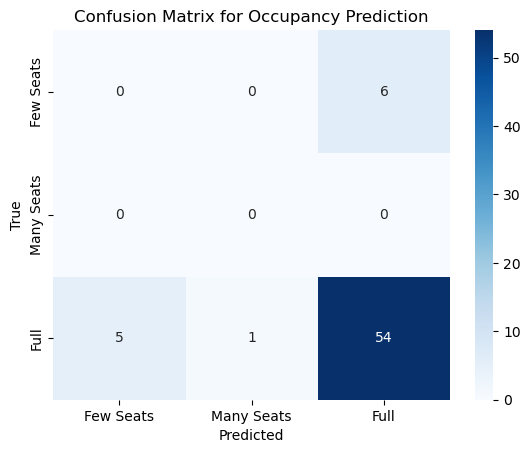

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
true_occupancy = y_test
predicted_occupancy = predictions

# Confusion matrix
conf_matrix = confusion_matrix(true_occupancy, predicted_occupancy)

# Plot
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Few Seats', 'Many Seats', 'Full'], yticklabels=['Few Seats', 'Many Seats', 'Full'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Occupancy Prediction')
plt.show()

The confusion matrix heatmap provides a comprehensive overview of the model's performance in predicting occupancy status. The diagonal elements represent correct predictions, while off-diagonal elements indicate misclassifications. For the "Few Seats" and "Many Seats" classes, the model struggles, showing zeros for precision, recall, and F1-score. This suggests that the model has difficulty accurately identifying instances with few or many available seats. However, for the "Full" class, the model demonstrates strong performance with a precision of 0.9, recall of 0.92, and an F1-score of 0.91. Despite an overall high accuracy, the model's effectiveness is imbalanced, emphasizing the need for improvements in predicting lower-occupancy scenarios, particularly for "Few Seats" and "Many Seats". 